In [1]:
import psycopg2
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
from bd import *
import time
import random
import re
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from get_data import *

In [18]:
db = SQLDatabase(user="postgres", password="1111", host="localhost", port="5432", db_name="corunaRealEstateMarket")
db_con = db.get_connection()
db_cursor = db.get_cursor()
data = db.get_data_v1()

Database object created


c:\Users\ivan\Desktop\Coding\corunaRealEstateMarket\bd.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, self.connection)


In [19]:
# data = data[data['municipio'].str.contains('oru')]
data = data[['precio', 'direccion_x', 'direccion_y', "tamano", "n_habitaciones"]]
data = data[data['direccion_x']<43.40]
data = data[data['direccion_x']>43.30]
# data = data[data['direccion_y']<-8.35]
# data = data[data['direccion_y']>-8.45]

data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548 entries, 0 to 712
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   precio          548 non-null    float64
 1   direccion_x     548 non-null    float64
 2   direccion_y     548 non-null    float64
 3   tamano          548 non-null    int64  
 4   n_habitaciones  548 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 25.7 KB


### Clustering

In [20]:
x = data[['direccion_x', 'direccion_y']]
y = data['precio']/data['tamano']

In [21]:
clustering = DBSCAN(eps=0.01, min_samples=2).fit(x)
clustering.labels_

array([ 0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  1,  1,
        1,  1,  4,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  5,  1,
        1,  3,  4,  1,  1,  1,  1,  1,  1,  1,  3,  4,  1,  6,  7,  1,  1,
        8,  1,  1,  1,  9,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, 10,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  9,  0,  1,  1, 11,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        9,  4,  9,  0,  1,  1,  2,  1,  1,  1,  0,  1,  1,  1,  0, 10, 12,
        8,  1,  1,  1, 11,  1,  9,  4,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  1,  1,  2,  1,  1,  0,  6,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  2, -1,  1,  1,  1, 13,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, 11,  1,  1,  1,  1,  1,  9,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  0,  9,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  1,  1,  1,  1,  1,  2,  1,  2,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  3

C:\Users\ivan\AppData\Local\Temp\ipykernel_4356\679616790.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_labels))


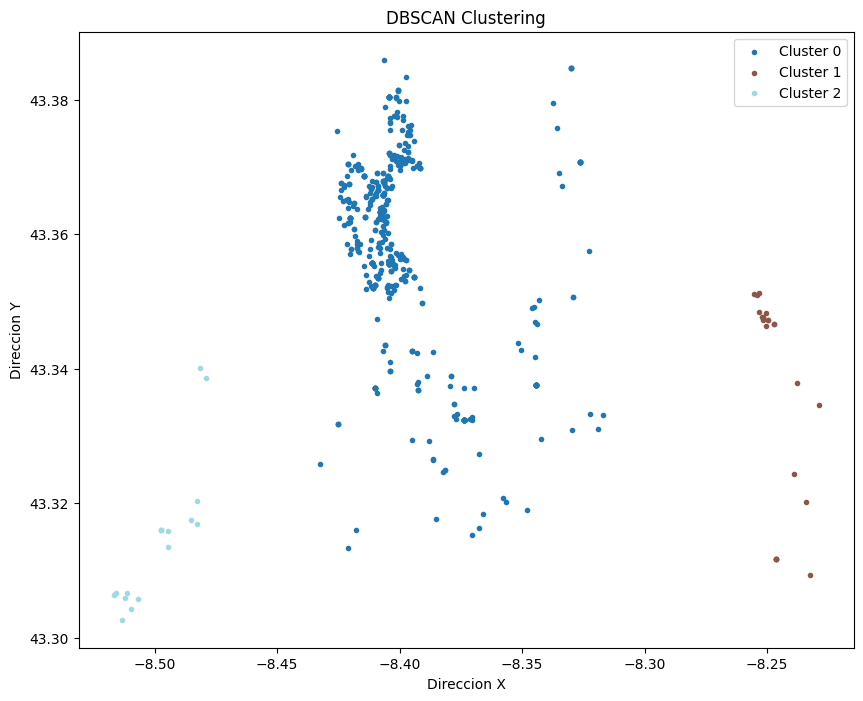

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Assuming 'data' is your DataFrame with 'direccion_x', 'direccion_y', 'precio', and 'tamano'

# Select the relevant features
x = data[['direccion_x', 'direccion_y']]

# Apply DBSCAN
dbscan = DBSCAN(eps=0.02, min_samples=3)  # You can adjust eps and min_samples as needed
labels = dbscan.fit_predict(x)

# Create a scatter plot
plt.figure(figsize=(10, 8))

# Get unique labels excluding noise points (-1)
unique_labels = np.unique(labels[labels != -1])

# Define colors for each label
colors = plt.cm.get_cmap('tab20', len(unique_labels))

for label, color in zip(unique_labels, colors.colors):
    if label == -1:
        color = [0.6, 0.6, 0.6]  # Grey color for noise points
    plt.scatter(x[labels == label]['direccion_y'], x[labels == label]['direccion_x'], color=color, marker='.', label=f'Cluster {label}')

plt.xlabel('Direccion X')
plt.ylabel('Direccion Y')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()



C:\Users\ivan\AppData\Local\Temp\ipykernel_4356\1179034253.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('RdYlGn_r')


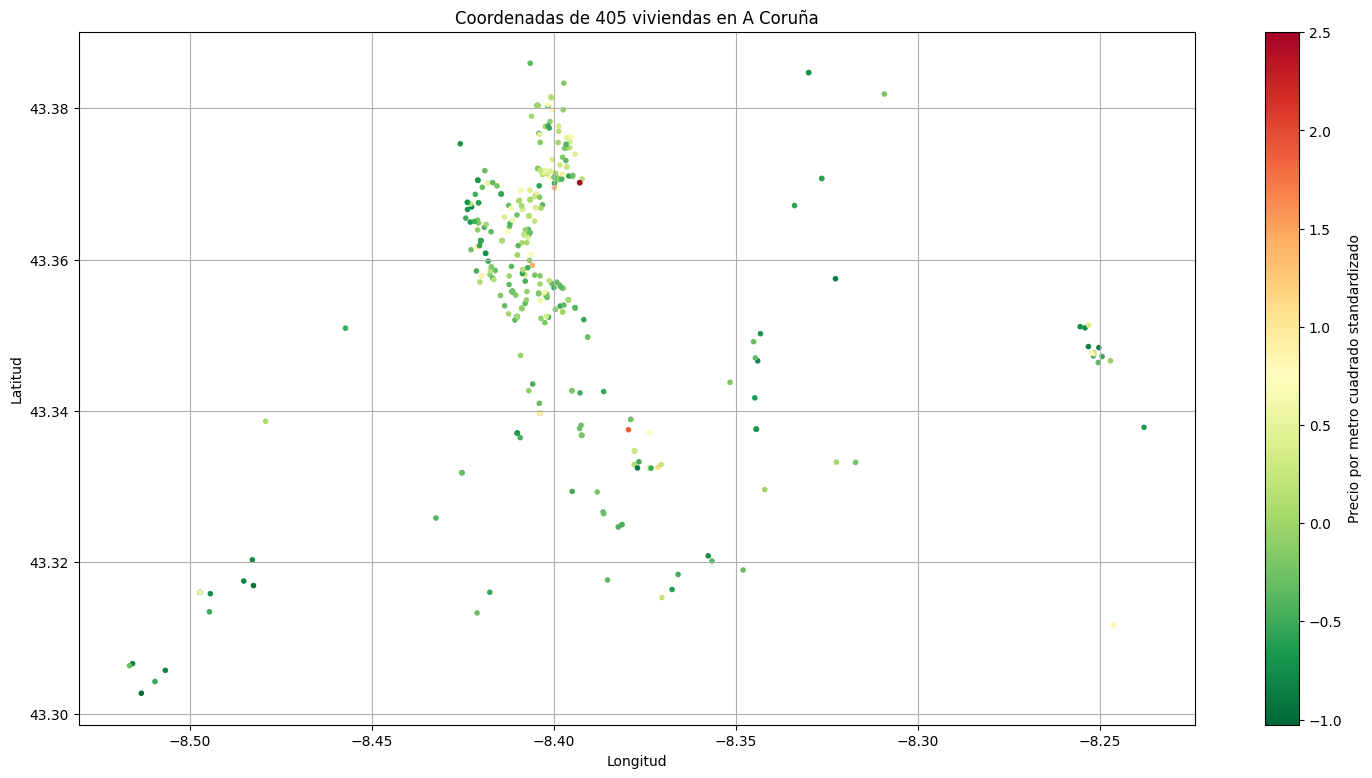

In [35]:
filter = 3
filter_left = -3

original_data = data.copy()
data = original_data[original_data['tamano']<115]

longs = np.array(data['direccion_x'].values.tolist())
lats = np.array(data['direccion_y'].values.tolist())
precio_m2 = np.array((data['precio']/data['tamano']).values.tolist())
normalized_precios = (precio_m2 - np.mean(precio_m2)) / np.std(precio_m2)

lats = lats[(np.abs(normalized_precios)<filter) & (normalized_precios>filter_left)]
longs = longs[(np.abs(normalized_precios)<filter) & (normalized_precios>filter_left)]
normalized_precios = normalized_precios[(np.abs(normalized_precios)<filter) & (normalized_precios>filter_left)]

# Define a colormap ranging from green to red
colormap = plt.cm.get_cmap('RdYlGn_r')

# Create the scatter plot
plt.figure(figsize=(18, 9))
scatter = plt.scatter(lats, longs, c=normalized_precios, cmap=colormap, marker='.')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Coordenadas de ' + str(len(lats)) + ' viviendas en A Coruña')
plt.grid(True)

# Add colorbar to indicate price range
cbar = plt.colorbar(scatter)
cbar.set_label('Precio por metro cuadrado standardizado')

plt.show()


In [36]:
ds

NameError: name 'ds' is not defined